In [1]:
import math, copy, random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### Function to find virtual anchor nodes

In [2]:
def find_virtual_anchors(x,y,d):
    anchors=[]
    anchors.append([x+d*np.cos(np.pi/3),y+d*np.sin(np.pi/3)])
    anchors.append([x+d,y])
    anchors.append([x-d,y]);
    anchors.append([x+d*np.cos(np.pi/3),y-d*np.sin(np.pi/3)]);
    anchors.append([x-d*np.cos(np.pi/3),y-d*np.sin(np.pi/3)]);
    anchors.append([x-d*np.cos(np.pi/3),y+d*np.sin(np.pi/3)]);
    return anchors

### Optimization Function

In [89]:
def Fun(x,y, anchors, target):
    f = 0
    for i in range(3):
        d = math.dist([target[0],target[1]], [anchors[i][0],anchors[i][1]])
        d1= math.dist([x,y],[anchors[i][0],anchors[i][1]])
        f +=  math.pow( abs(d1 - d),2)
    return f/3

### NMRA optimizer function

In [122]:
def NMRA(maxIter,best,n,anchors,target,x,y):
    
    # Finding 2 Virtual Anchor nodes with shortest distance from target node

    d=math.dist([x,y],anchors[0]);
    virtual_anchors=find_virtual_anchors(anchors[0][0],anchors[0][1], d)
    va_dist=[]
    for j in range(len(virtual_anchors)):
        dist=math.dist([x,y],[virtual_anchors[j][0],virtual_anchors[j][1]])
        l=[dist,j]
        va_dist.append(l)
    va_dist.sort()
    idx1,idx2=va_dist[0][1],va_dist[1][1]
    va1,va2=virtual_anchors[idx1],virtual_anchors[idx2]
    anchors.append(va1)
    anchors.append(va2)
    
    # Calculating centroid
    centroid_x,centroid_y=(va1[0]+va2[0]+anchors[0][0])/3,(va1[1]+va2[1]+anchors[0][1])/3
    x_lb,x_ub,y_lb,y_ub=centroid_x-1,centroid_x+1,centroid_y-1,centroid_y+1
    
    rats=[]
    # 24
    workers=n-n//5 
    # 6
    breeders=n//5
    fitness=[]
    bp=0.5
   
    # First rat is at centroid
    rats.append([centroid_x,centroid_y])
    fitness.append(Fun(centroid_x,centroid_y,anchors,target))
    # Initializing random rats and calculating their fitness
    for i in range(n-1):
        x1=x_lb+np.random.random()*(x_ub-x_lb)
        y1=y_lb+np.random.random()*(y_ub-y_lb)
        rats.append([x1,y1])
        fitness.append(Fun(x1,y1,anchors,target))
    
    sorted_fitness = []
    for i in range(n):
        l = [fitness[i],i]
        sorted_fitness.append(l)
    sorted_fitness.sort()
    
    
    for itr in range(maxIter):
        S = copy.deepcopy(rats)
        ratBest=rats[sorted_fitness[0][1]]
        
        # Workers phase
        
        for i in range(breeders, n):
            ab = []
            for j in range(breeders, n):
                ab.append(sorted_fitness[j][1])
            idx = sorted_fitness[i][1]
            lmda = np.random.random()
            random.shuffle(ab)
            # print(lmda)
            S[idx][0] = S[idx][0] + lmda * (S[ab[0]][0] - S[ab[1]][0])
            S[idx][1] = S[idx][1] + lmda * (S[ab[0]][1] - S[ab[1]][1])
            # Calculating and updating new fitness and rat's coordinates
            fnew = Fun(S[idx][0], S[idx][1], anchors, target)
            if fnew < fitness[idx]:
                fitness[idx] = fnew
                rats[idx]= S[idx]
        
        # Breeders phase
        for i in range(breeders):
            if np.random.random() > bp:
                lmda = np.random.random()
                idx = sorted_fitness[i][1]
                
                S[idx][0] = (1-lmda)*S[idx][0] + lmda*(ratBest[0] - S[idx][0])
                S[idx][1] = (1-lmda)*S[idx][1] + lmda*(ratBest[1] - S[idx][1])
                fnew = Fun(S[idx][0], S[idx][1], anchors, target)
                if fnew < fitness[idx]:
                    fitness[idx] = fnew
                    rats[idx]= S[idx]
                    
        # Updating sorted fitness list
        sorted_fitness.clear()
        for i in range(n):
            l = [fitness[i],i]
            sorted_fitness.append(l)
        sorted_fitness.sort()
        
        
        # Uncomment this to show the process
        
#         idx_graph=sorted_fitness[0][1]
#         r=np.array(rats)
#         an=np.array(anchors)
#         xr,yr=r.T
#         xa,ya=an.T
#         fig,ax=plt.subplots()
#         ax.set_xlim(0,15)
#         ax.set_ylim(0,15)
#         ax.scatter(xr,yr,marker='^')
#         ax.scatter(xa,ya)
#         ax.scatter(target[0],target[1])
#         ax.scatter(rats[idx_graph][0],rats[idx_graph][1], marker='s')
#         plt.show()
#         print(rats[idx_graph])
#         print(sorted_fitness[0][0])

    
    idr=sorted_fitness[0][1]
    #print(rats[idr])
    
    return rats[idr]

### Constants and deploying nodes

In [123]:
no_of_movements = 5
no_of_target_nodes = 20
anchor1 = [7.5,7.5]
target_nodes=[]

x_target=np.random.uniform(0,15,no_of_target_nodes)
y_target=np.random.uniform(0,15,no_of_target_nodes)

In [124]:
predicted_C = []
original_C = []
for i in range(no_of_movements):
    predicted=[]
    original=[]

    # Adding random movement to the target nodes
    for i in range(len(x_target)):
        x_target[i]+=0.1*random.uniform(-15,15)
        y_target[i]+=0.1*random.uniform(-15,15)
        if x_target[i]<0 or x_target[i]>15:
            x_target[i]=random.uniform(0,15)
        if y_target[i]<0 or y_target[i]>15:
            y_target[i]=random.uniform(0,15)

    for i in range(len(x_target)):
        coordinates=NMRA(50,3,30,[anchor1],[x_target[i],y_target[i]],x_target[i],y_target[i])
        predicted.append(coordinates)
        original.append([x_target[i],y_target[i]])
    
    predicted_C.append(predicted)
    original_C.append(original)
# print(predicted,original)

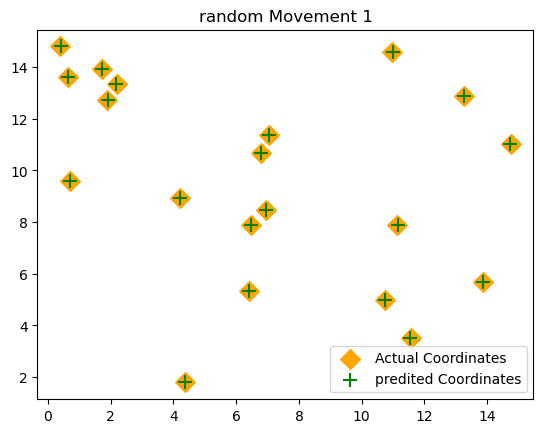

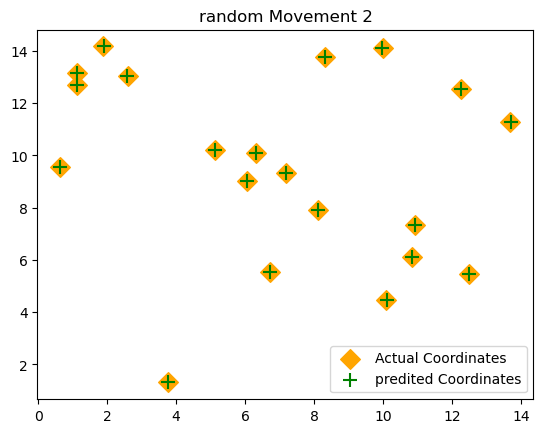

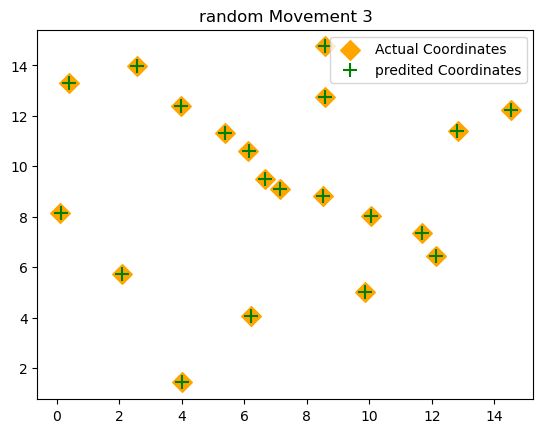

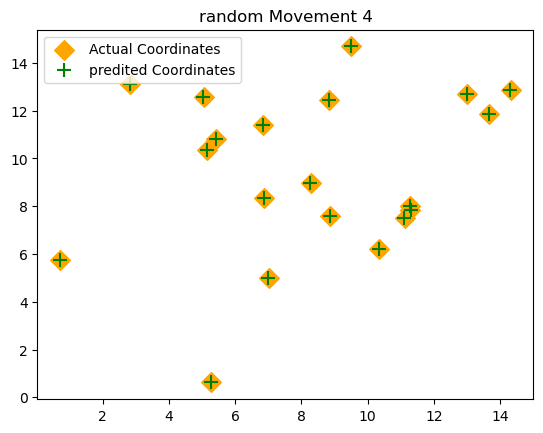

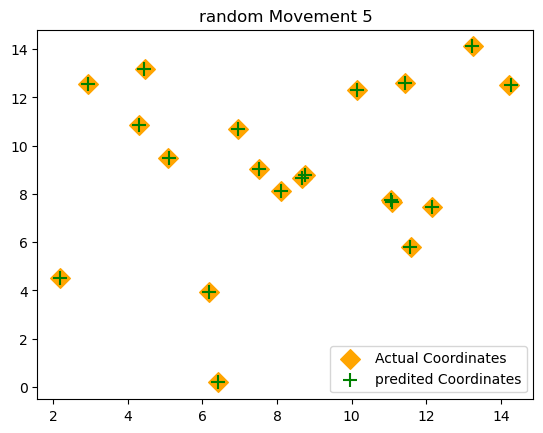

In [125]:
for i in range(no_of_movements):
    predicted = np.array(predicted_C[i])
    predicted_x, predicted_y = predicted.T

    original = np.array(original_C[i])
    original_x, original_y = original.T
    
    title = 'random Movement '+ str(i +1)
    
    plt.title(title)
    plt.scatter(original_x, predicted_y, marker = 'D', s = 100, c = 'Orange', label = 'Actual Coordinates')
    plt.scatter(predicted_x, predicted_y, marker = '+', s = 100, c = 'green', label = 'predited Coordinates')
    plt.legend()
    plt.show()



### Error Calculation

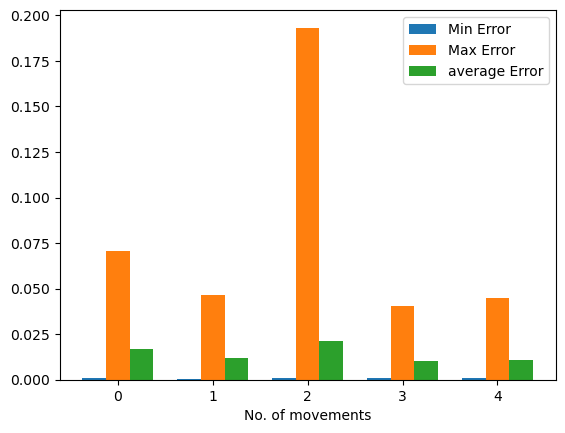

In [126]:
min_error = []
avg_error = []
max_error = []
temp = np.arange(no_of_movements)
for i in range(no_of_movements):
    error = []
    avg_e = 0
    for j in range(no_of_target_nodes):
        e = math.dist(predicted_C[i][j], original_C[i][j])
        avg_e += e
        error.append(e)
    avg_e/=no_of_target_nodes
    max_e = max(error)
    min_e = min(error)
    
    avg_error.append(avg_e)
    max_error.append(max_e)
    min_error.append(min_e)


    
plt.bar(temp - 0.25, min_error, 0.25, label = 'Min Error')
plt.bar(temp, max_error, 0.25 , label = 'Max Error')
plt.bar(temp + 0.25, avg_error,0.25, label = 'average Error')
plt.legend()
plt.xlabel('No. of movements')
plt.show()


In [129]:
FA_avg_error = [2.3594, 3.0538, 2.4412, 3.136, 2.6024]
BBO_avg_error = [0.3838, 0.8227, 0.6926, 0.7984, 0.9317]
PSO_avg_error = [0.7048,1.1338,0.8236,0.5982, 0.7536]
HPSO_avg_error = [0.2449,0.3536,0.3338,0.3491,0.2209]